#### Домашняя работа №3 "Введение в машинное обучение: линейная регрессия"
##### Работу выполнила студентка группы Т12О-101М-20 

##### Трусова В. Л.

Загрузка исходных данных

In [29]:
import numpy as np
from numpy.linalg import inv, norm

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from matplotlib import pyplot as plt

from scipy.spatial import distance

In [36]:
boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target
print('Фичи')
print(features)
print('\nЦелевая переменная y')
print(y[:10])

Фичи
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


## Задание 1

Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии на языке python 

Нужно написать код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$


Сравните по евклидовому расстоянию коэффициенты из класса `LinearRegression` и полученные аналитическим способом

In [37]:
# вычисляем к-ты линейной регрессии
w_analytic = np.zeros(features.shape[1])

one = np.ones(len(features))
features_1 = np.c_[one,features] # [столбец '1' [матрица фичей]]

xtx_1 = (inv(np.dot(features_1.T,features_1)))        
w_analytic = np.dot(np.dot((xtx_1),features_1.T),y)

print(f'Аналитически определённые коэффициенты {w_analytic}')

Аналитически определённые коэффициенты [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


Проверка по евклидовой метрике

In [38]:
# обучаем модель "из коробки"
reg = LinearRegression().fit(features, y)
w_sklearn = np.append([reg.intercept_], reg.coef_)

try:
    linalg_norm = norm(w_sklearn - w_analytic)
    print(f"Коэффициенты, вычисленные моделью sklearn {w_sklearn}")
    print(f"Евклидово расстояние между наборами коэффициентов {linalg_norm}\n")
except:
    print("!ВАЖНО!: к матрице фичей X нужно добавить столбец, который состоит из единиц")
    print("Это т.н. 'тривиальный' признак $x_0=1$")

Коэффициенты, вычисленные моделью sklearn [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]
Евклидово расстояние между наборами коэффициентов 2.8110188654780666e-11



Проверка на правильность

In [39]:
import unittest


class TestNotebook(unittest.TestCase):
    def test_task(self):
        self.assertAlmostEqual(linalg_norm, 0.000000, places=6)

unittest.main(argv=[''], verbosity=2, exit=False)

test_task (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## Задание 2

Визуализируйте в виде "столбиков" коэффициенты "из коробки" (т.е. из sklearn) и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

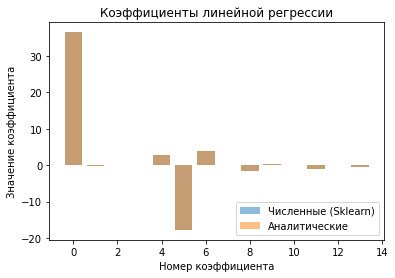

In [40]:
%matplotlib inline

plt.title('Коэффициенты линейной регрессии')
plt.bar(np.arange(len(w_sklearn)),w_sklearn, alpha=0.5, label='Численные (Sklearn)')
plt.bar(np.arange(len(w_analytic)),w_analytic, alpha=0.5, label='Аналитические')
plt.legend(loc='lower right', prop={'size': 10})
plt.xlabel('Номер коэффициента')
plt.ylabel('Значение коэффициента')
plt.show()

## Задание 3

Постройте предсказания двумя моделями

* вашей моделью
* моделью из библиотеки sklearn

Посчитайте, какую ошибку $(\hat{y}-y)$ даёт модели на каждом обучающем примере каждая из моделей и постройте две гистограммы на одном графике c наложением (одна должна "просвечивать" через другую)

Если вы всё сделали правильно, гистограммы ошибок должны совпасть

In [42]:
y_pred = reg.predict(features)
y_true = y

In [61]:
error_sklearn = y_pred - y_true
error_analytic = features_1.dot(w_analytic) - y_true

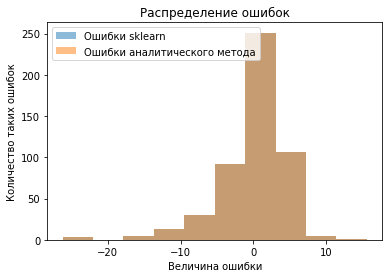

In [66]:
fig, subplot = plt.subplots()

subplot.hist(error_sklearn, alpha = 0.5, label='Ошибки sklearn')
subplot.hist(error_analytic, alpha = 0.5, label='Ошибки аналитического метода')
plt.legend(loc='upper left', prop={'size': 10})
subplot.set_title('Распределение ошибок')
subplot.set_xlabel('Величина ошибки')
subplot.set_ylabel('Количество таких ошибок')
plt.show()